In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


In [9]:
def load_and_preprocess_data():
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    train_images, test_images = train_images / 255.0, test_images / 255.0
    train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
    test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
    return train_images, train_labels, test_images, test_labels


In [10]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [11]:
def train_model(model, train_images, train_labels):
    model.fit(train_images, train_labels, epochs=5, batch_size=64)


In [12]:
def evaluate_model(model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test accuracy: {test_acc}")


In [13]:
def predict_random_image(model, test_images, test_labels):
    random_index = np.random.randint(0, len(test_images))
    image = test_images[random_index]
    image = image.reshape(1, 28, 28, 1)
    predicted_label = model.predict(image)
    predicted_label = np.argmax(predicted_label)
    plt.imshow(test_images[random_index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_label}, Actual: {test_labels[random_index]}")
    plt.show()


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8711 - loss: 0.4254
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9815 - loss: 0.0566
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9885 - loss: 0.0367
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9910 - loss: 0.0278
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9923 - loss: 0.0231
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9878 - loss: 0.0408
Test accuracy: 0.9911999702453613
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


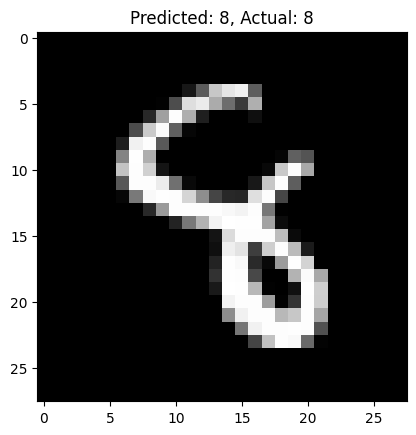

In [14]:
def main():
    train_images, train_labels, test_images, test_labels = load_and_preprocess_data()
    model = create_model()
    train_model(model, train_images, train_labels)
    evaluate_model(model, test_images, test_labels)
    predict_random_image(model, test_images, test_labels)

if __name__ == '__main__':
    main()
